# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
>selection
* Do you need to encode the target variable (Yes/No)?
> yes
* If yes, briefly explain why you need to encode the target variable.
> Target variable encoding is necessary for compatibility with machine learning algorithms, as they typically require numerical representation for processing.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> Label encoding
* Explain why you have selected the above encoding method.
>Because the target variable has only two categories (Yes/No), it's convenient to encode it as 1/0 for simplicity and ease of use.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [2]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
df['Selection'] = label_encoder.fit_transform(df['Selection'])

# Display the transformed DataFrame
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


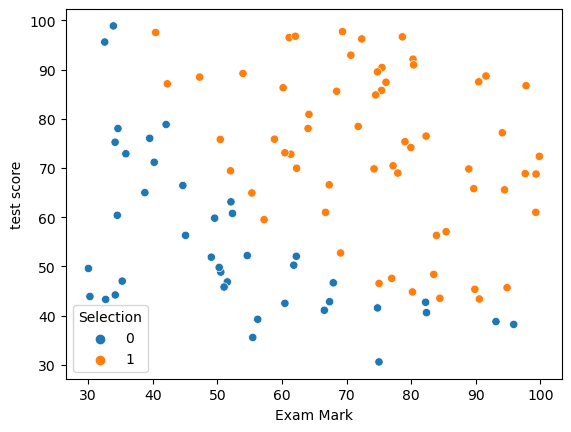

In [3]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

# Scatter plot
sns.scatterplot(data=df, x='Exam Mark', y='test score', hue='Selection')

# Display the plot
plt.show()


## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [4]:
# Write a function 'predict' to compute the logistic Regression model

import numpy as np

def sigmoid(z):

    return 1 / (1 + np.exp(-z))

def predict(w, b, x):

    z = np.dot(x, w) + b
    return sigmoid(z)

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> no
* Explain why you said yes or no to the above questions.
> as it is a classification problem we need to predict only the class it belongs

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> it is the sum of all cost function ,it shows over all performance of the model
* What is a cost function?
>it is the error between each predicted point and the original point
* What is the distinction between them?
> Loss function: Operates on a single data point. It measures the error for a single instance. Cost function: Aggregates the losses over the entire dataset. It measures the average error over all training examples.

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [5]:
#write a function to estimate the derivatives of the cost function
def compute_cost(w, b, x, y):
 
    m = len(y)
    predictions = predict(w, b, x)
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


def compute_gradient_wb(w, b, x, y):
    
    m = len(y)
    predictions = predict(w, b, x)
    dz = predictions - y
    dw = 1/m * np.dot(x.T, dz)
    db = 1/m * np.sum(dz)
    return dw, db


### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [6]:
# Write a function to perform the gradient decent

def gradient_descent(w, b, X_train, X_test, y_train, y_test, alpha, num_iter):

    train_costs = []
    test_costs = []
    for i in range(num_iter):
        # Compute gradients
        dw, db = compute_gradient_wb(w, b, X_train, y_train)
        
        # Update weights and bias
        w -= alpha * dw
        b -= alpha * db
        
        # Compute training and testing costs and append to lists
        train_cost = compute_cost(w, b, X_train, y_train)
        test_cost = compute_cost(w, b, X_test, y_test)
        train_costs.append(train_cost)
        test_costs.append(test_cost)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Training Cost = {train_cost}, Testing Cost = {test_cost}")

    return w, b, train_costs, test_costs


## Model Training

In [14]:
# Write the code to train the model

# Split the data into train and test datasets using
# see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

alpha = 0.001

num_iter = 1000

w_opt, b_opt, train_costs, test_costs = gradient_descent(w_ini, b_ini, X_train, X_test, y_train, y_test, alpha, num_iter)

print(f"Final parameters: w:{w_opt}, b:{b_opt}")

Iteration 0: Training Cost = nan, Testing Cost = nan
Iteration 100: Training Cost = 0.2743425366051524, Testing Cost = 0.3472287790440197
Iteration 200: Training Cost = 0.27418349111847296, Testing Cost = 0.3518388350771199
Iteration 300: Training Cost = 0.2741530354771521, Testing Cost = 0.3518273214461571
Iteration 400: Training Cost = 0.2741225970070689, Testing Cost = 0.35181086356281094
Iteration 500: Training Cost = 0.27409217555161547, Testing Cost = 0.35179441324916216
Iteration 600: Training Cost = 0.27406177109608615, Testing Cost = 0.35177797571407843
Iteration 700: Training Cost = 0.274031383625793, Testing Cost = 0.35176155095076145
Iteration 800: Training Cost = 0.27400101312606523, Testing Cost = 0.35174513894692555
Iteration 900: Training Cost = 0.2739706595822486, Testing Cost = 0.35172873969029483
Final parameters: w:[0.08239114 0.06566054], b:-9.026491511598241


/tmp/ipykernel_15929/3970890139.py:6: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/tmp/ipykernel_15929/3970890139.py:6: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


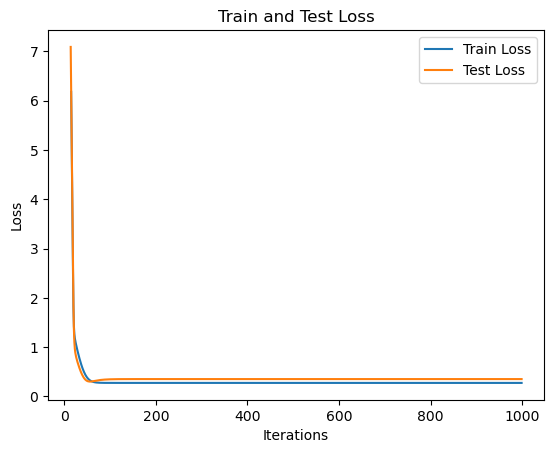

In [15]:
# Plot the train and test loss in one plot
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.plot(range(num_iter), train_costs, label='Train Loss')
plt.plot(range(num_iter), test_costs, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()



<Axes: xlabel='Exam Mark', ylabel='test score'>

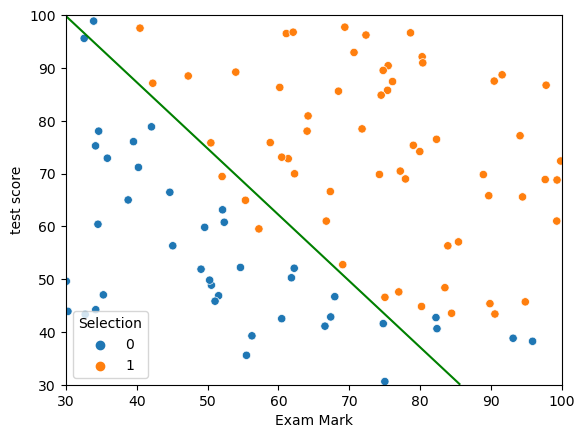

In [16]:
#  plot the Logistic Regression Model for the estimated w and b values

P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w[0]+Y[i,j]*w[1]+b
      logReg[i,j] = 1/(1+np.exp(-zz))


plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
# plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')


### Answer the following


* What does the P value signify in the provided code?
> it will be from 0-1 as it is a probability
* How will altering the P value affect the outcome?
> it determins the threshold so when it changes the prediction also changes ie change the decision boundary changes
* What range of values can P encompass?
> it is the threshold at which the point is in positive classification(Yes)
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
>the confidence of prediction is depended on the p value.So the boundary condtion changes the prediction also changes

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [17]:
# Your code
# Scores of the student
exam_score = 65
test_score = 65

# Predicting the probability of passing the interview
student_scores = np.array([[exam_score, test_score]])
pass_probability = predict(w_opt, b_opt, student_scores)

# Convert the probability to a class label
pass_label = 'Yes' if pass_probability >= 0.5 else 'No'

print(f"The probability of passing the interview: {pass_probability[0]}")
print(f"The student will {'pass' if pass_label == 'Yes' else 'not pass'} the interview.")

The probability of passing the interview: 0.6449393168275962
The student will pass the interview.
